## # Linear regression - Ordinary Least Squares
$\pmb{y} = \pmb{\theta}(\pmb{x})+  {\sigma}\pmb{\epsilon},   \quad \sigma\in\mathbb{R}^{+}$,
$\pmb{\theta}=[\theta_0,\theta_1] $


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, Math, Latex

%matplotlib inline


In [8]:
#  actual parameter values
theta0 = np.pi/10; theta1 = np.pi*np.pi; 

# sample size 
Mvalue = input("Enter sample size:\n") 
M = int(Mvalue)                         
X = np.random.rand(M,1)
# Actual model
y =  theta1 * X + theta0

Enter sample size:
1024


### Ordinary Least Squares

$\begin{align*}
\min_{\pmb{W}}\frac{1}{2}\mid\mid\pmb{W}^{\top}\pmb{x} - \hat{\pmb{y}}\mid\mid^{2}, &\qquad\textrm{  Residual Sum of Squares}\\
\,
\\
\hat{\theta}_1 =\frac{(\sum y)(\sum x^{2}) - (\sum x)(\sum xy)}{M(\sum x^{2})-(\sum x^{2})},&\qquad
\hat{\theta}_0  =\frac{M(\sum xy)- (\sum x)(\sum y)}{M(\sum x^{2})-(\sum x^{2})} 
\end{align*}
$

In [13]:
# solving by OLS
def OLSLReg(X,ynoisy,sigma, color):
  M = int(len(X)) 
  X_b = np.c_[np.ones((M,1)),X]
  # parameter estimates for theta1 and  theta0 
  theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(ynoisy)
  Xp = np.linspace(0, 1, M,  endpoint=False)
  yall = theta_best[1]*Xp + theta_best[0]
  print('sigma= {:.2f}'.format(sigma),theta_best[0],theta_best[1])
  plt.plot(X,ynoisy,color+'.', label='$\sigma= {:.2f}$'.format(sigma))# Observations
  plt.plot(Xp,yall,color, linestyle='--') 

true values = : 0.3141592653589793 9.869604401089358
sigma= 0.10 [0.32380844] [9.85410865]
sigma= 1.00 [0.29306236] [10.02553171]
sigma= 3.00 [0.49271658] [9.61604195]
sigma= 10.00 [1.37934259] [7.76689444]


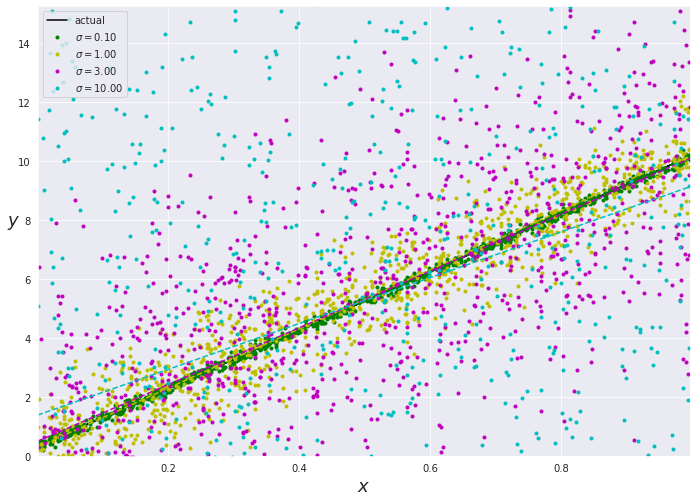

In [14]:
# Plotting
figure(figsize=(11.7,8.27))
print('true values = :',theta0,theta1)
plt.plot(X,y, 'k', label='actual')                             # actual
 
# noisy measurments 
sigmav = [0.1, 1, 3, 10]
colorv = ['g','y','m','c']
namev = ['0.1', '.3', '1', '3']
for i in range(len(sigmav)): 
  # Generation of noisy observations
  ynoisy =  theta1 * X + theta0 + sigmav[i]*np.random.randn(M,1)
  OLSLReg(X,ynoisy,sigmav[i], colorv[i])

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([min(X),max(X),0,1.5*max(y)])
plt.legend()
plt.show()

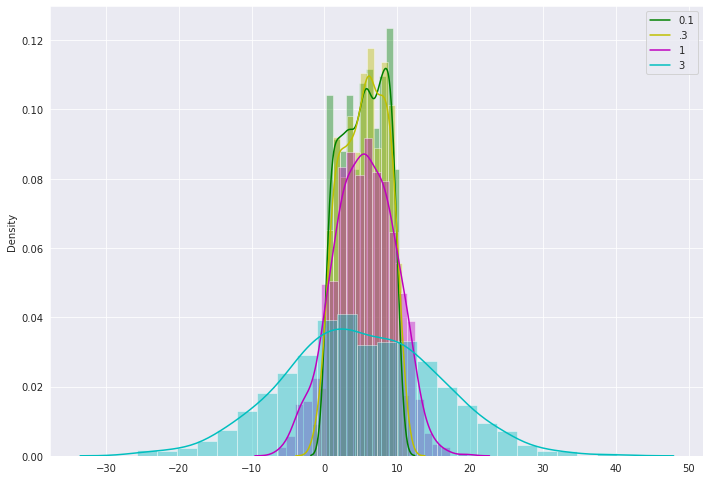

In [5]:
# Histograms of y
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# matplotlib histogram
Nbins = int(1 + 3.322*np.log2(M))
X = np.random.rand(M,1)

sns.set_style('darkgrid')
yn = []
for i in range(len(sigmav)): 
  # Generation of noisy observations
  t = theta1 * X + theta0 + sigmav[i]*np.random.randn(M,1)
  yn.append(t)
  sns.distplot(yn[i],color=colorv[i])

plt.legend(namev)
plt.show()

## Gaussian Maximum Likelihood Estimation 
$\begin{align}
x&\sim\mathcal{N}_x(\mu_x,\sigma_x^{2}),\\
y&\sim \mathcal{N}_y(\mu_y,\sigma_y^{2}) = \mathcal{N}_y(\pmb{W}^{\top}\pmb{x},\sigma_y^{2}) \\
\,
\\
\hat{\pmb{W}}_{MLE} &=\arg\max_{\pmb{W}} \mathcal{N}_y(\hat{\pmb{y}}\mid\pmb{W}^{\top}\pmb{x},\sigma_y^{2})\\
&\sim \arg\max_{\pmb{W}} \ln \mathcal{N}_y(\hat{\pmb{y}}\mid\pmb{W}^{\top}\pmb{x},\sigma_y^{2})\\
\,
\\
\hat{\pmb{W}}_{MLE} &=\arg\max_{\pmb{W}} \frac{1}{2}(\pmb{W}^{\top}\bf{x} -\hat{\pmb{y}})^{2} \\
&= \min_{\pmb{W}}\frac{1}{2}\mid\mid\pmb{W}^{\top}\pmb{x} - \hat{\pmb{y}}\mid\mid^{2}
\end{align}
$

Maximum Likelihood Estimation  on Gaussian pdf is the  estimate of  Mean Least Squares!